In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('COVID_Cleaned.csv')

df = df.transpose()
#df.to_csv('test.csv')
df = df.drop('Unnamed: 0')
df = df.reset_index()

df.columns = df.iloc[0]

df = df.rename(columns={'Date':'Zip Code'})
df = df.drop([0,0]) 

df1 = df.loc[:,'2020-04-11':]\
        .diff(axis=1)\
        .drop(columns='2020-04-11')\
  

dates = df['Zip Code']
df1.insert(0,'Zip Code',dates)    

df1['Zip Code'] = df1['Zip Code'].astype(float).astype(int) 
df.to_csv('MD_COVID_NewCasesByDate.csv')

df1 = pd.melt(df1,id_vars='Zip Code',value_name='cases')
df1 = df1.rename(columns={0:'Date'})
df1['cases'] = df1['cases'].astype(int)

df1['cases'] = df1['cases'].clip(lower=0)

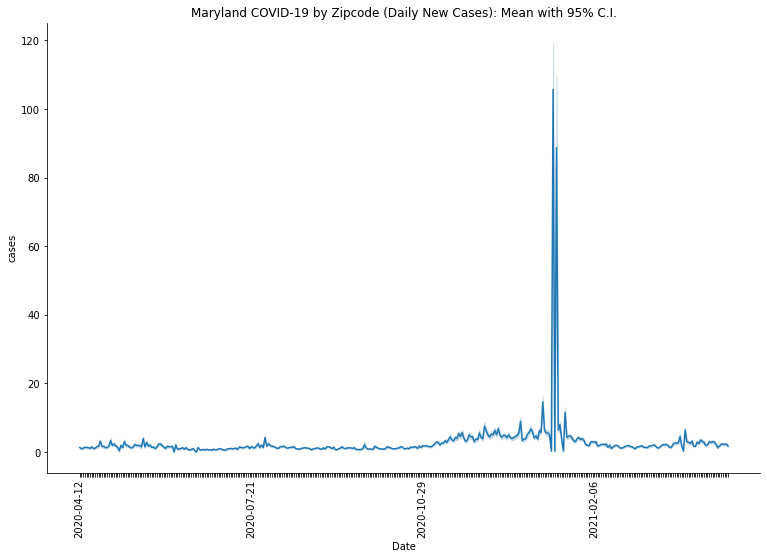

In [20]:
g = sns.relplot(x='Date',y='cases',data=df1,kind='line',palette='Spectral')
g.set(title='Maryland COVID-19 by Zipcode (Daily New Cases): Mean with 95% C.I.')
g.set_xticklabels(rotation = 90)
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%100 != 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
    
g.fig.set_figwidth(12)
g.fig.set_figheight(7)

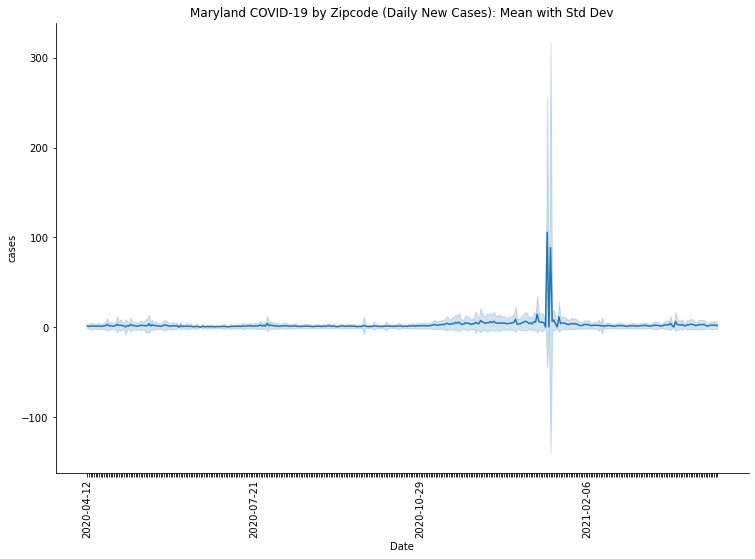

In [22]:
h = sns.relplot(x='Date',y='cases',data=df1,kind='line',palette='Spectral',ci='sd')
h.set(title='Maryland COVID-19 by Zipcode (Daily New Cases): Mean with Std Dev')
h.set_xticklabels(rotation = 90)
for ax in h.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%100 != 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
    
h.fig.set_figwidth(12)
h.fig.set_figheight(7)

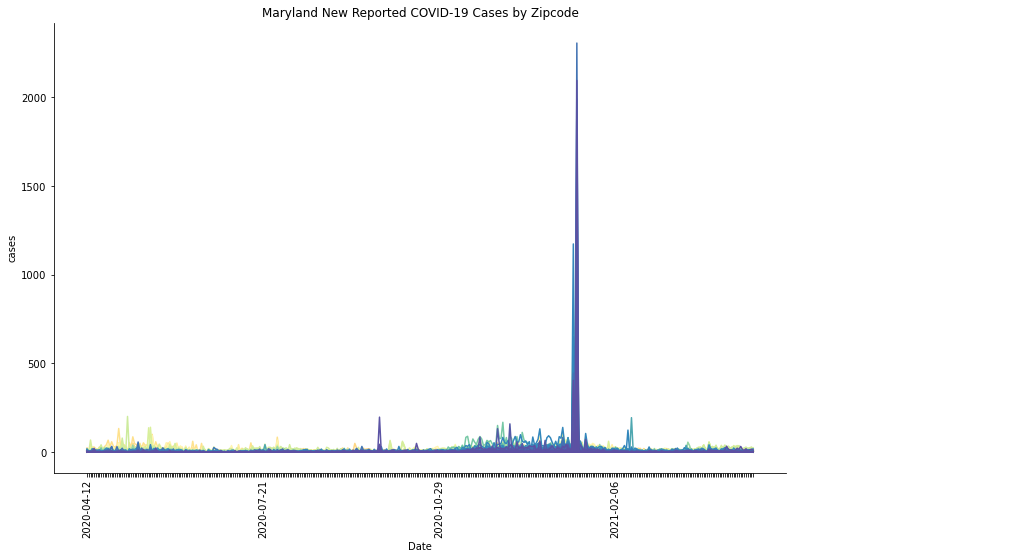

In [23]:
f = sns.relplot(x='Date',y='cases',data=df1,kind='line',hue='Zip Code',legend=False,palette='Spectral')
f.set(title='Maryland New Reported COVID-19 Cases by Zipcode')
f.add_legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=2)
f.set_xticklabels(rotation = 90)
for ax in f.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%100 != 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
    
f.fig.set_figwidth(12)
f.fig.set_figheight(7)